**AIM OF THE NOTEBOOK**

THE AIM OF THE NOTEBOOK IS TO SHOW THE IMPLEMENTATION OF GAN(GENERATIVE ADVERSARIAL NETWORK) USING <a href=https://jax.readthedocs.io/en/latest/index.html>JAX</a>, A PYTHON FRAMEWORK DEVELOPED BY GOOGLE AND DEEPMIND.
<img src="https://github.com/valentingol/GANJax/raw/main/ressources/logo_jax.jpeg" height="600" width="1000">
**WHAT IS JAX?**

JAX is NumPy on the CPU, GPU, and TPU, with great automatic differentiation for high-performance machine learning research.

**WHAT IS A GAN?**

A generative adversarial network (GAN) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in June 2014. Two neural networks contest with each other in a game (in the form of a zero-sum game, where one agent's gain is another agent's loss). 

<img src="https://sthalles.github.io/assets/dcgan/GANs.png" height="300" width="1000">

**HOW DOES A GAN WORK?**

The GAN model architecture involves two sub-models: a generator model for generating new examples and a discriminator model for classifying whether generated examples are real, from the domain, or fake, generated by the generator model.

  `Generator Model` : that is used to generate new plausible examples from the problem domain.
  <p>
  <img src="https://machinelearningmastery.com/wp-content/uploads/2019/04/Example-of-the-GAN-Generator-Model.png">
  </p>

  <br>


  `Discriminator Model` : that is used to classify examples as real (from the domain) or fake (generated).
  <img src="https://machinelearningmastery.com/wp-content/uploads/2019/04/Example-of-the-GAN-Discriminator-Model.png">

<br>

**Types Of GANs**

1) DC GAN  

It is a Deep convolutional GAN. It is one of the most used, powerful, and successful types of GAN architecture. It is implemented with help of ConvNets in place of a Multi-layered perceptron. 

2)Progressive Growing of GAN

This technique was proposed in a 2018 paper by Nvidia Researchers, This approach resembles greedy layer-wise training of stacked autoencoders

3) Cycle GAN

It is released in 2017 which performs the task of Image Translation. Suppose we have trained it on a horse image dataset and we can translate it into zebra images.

In this notebook we are going to work with DCGAN and ProGAN





**ACKNOWLEDGEMENTS**
<ul>
<li>I would like to thank <a href="https://github.com/valentingol">
Valentin Goldité </a>for making this awesome repository for implementing GANs using JAX.</li>
<li>I would like to thank the creators of <a href="http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">CelebA</a> dataset.</li>
<li>I took some images and notes from <a href="https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/">machinelearningmastery.</a></li>
</ul>

**Let's first install requirements**

In [ ]:
!pip install tensorflow -f https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow_cpu-2.8.0-cp39-cp39-manylinux2010_x86_64.whl
!pip install --upgrade pip
# Installs the wheel compatible with CUDA 11 and cuDNN 8.2 or newer.
!pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_releases.html  # Note: wheels only available on linux.
!pip install --upgrade pip

# Installs the wheel compatible with Cuda >= 11.4 and cudnn >= 8.2
!pip install jax[cuda11_cudnn82] -f https://storage.googleapis.com/jax-releases/jax_releases.html

# Installs the wheel compatible with Cuda >= 11.1 and cudnn >= 8.0.5
!pip install jax[cuda11_cudnn805] -f https://storage.googleapis.com/jax-releases/jax_releases.html
!sudo ln -s /path/to/cuda /usr/local/cuda-X.X
!export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/usr/local/cuda/lib64
!pip install dm-haiku>=0.01 matplotlib>=3.5.0 optax>=0.1.0

Looking in links: https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow_cpu-2.8.0-cp39-cp39-manylinux2010_x86_64.whl
     |████████████████████████████████| 462 kB 3.9 MB/s 
     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.3.0+cuda11.cudnn805
    Uninstalling jaxlib-0.3.0+cuda11.cudnn805:
      Successfully uninstalled jaxlib-0.3.0+cuda11.cudnn805
Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 MB 6.2 MB/s eta 0:00:00
  Attempting un

**DATASET**

We are using the <a href=http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html>CelebA Dataset</a>, 


In order to use it either we have to download it from their <a href=http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html>website</a> or if we want to download the cropped version of dataset from the<a href=https://www.kaggle.com/jessicali9530/celeba-dataset> Kaggle </a> we will need to have a Kaggle account and setup the kaggle token. 

Since I was facing some issues downloading from their Gdrive and it may not be relevant for some users to create a Kaggle Account and setup the token and Kaggle API, I uploaded the dataset to Dropbox and made it public so that everyone can use it without any setups or anything!
If you are facing any issues with this link then you can <a href=mailto:susnatodhar10@gmail.com>mail</a> me 
  
<ul>

<li>
All rights of the dataset belong to the original authors
</li>
<li>
As mentioned on the website, the CelebA dataset is available for non-commercial research purposes only. For specifics please refer to the website.
</li>
<li>
I only used the dataset for educational purpose and if you have any objection about it, ask me I will remove it. 
</li>

</ul>

Let's Download the files from the DropBox link and extract it

In [ ]:
!wget https://www.dropbox.com/s/eeqi3nuj2z6zxes/celebA.zip?dl=0
!unzip '/content/celebA.zip?dl=0' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: /content/img_align_celeba/img_align_celeba/197617.jpg  
  inflating: /content/img_align_celeba/img_align_cel

**CLONE THE REPOSITORY**

<a href=https://github.com/valentingol/GANJax>GAN JAX</a> - A toy project to generate images from GANs with JAX

This project aims to bring the power of JAX, a Python framework developped by Google and DeepMind to train Generative Adversarial Networks for images generation.

<ul>
<li>All the credits of implementing DCGAN and ProGAN using JAX goes to the <a href=https://github.com/valentingol>author</a></li>
<li>I Took some of the examples from the repository (eg pretrained CIFAR) model and convert to a self-contained colab. as described by <a href=https://github.com/murphyk>Kevin P Murphy</a> in this <a href=https://github.com/probml/pyprobml/issues/675#issue-1140575751>thread.</a></li>
</ul>

In [ ]:
!git clone https://github.com/valentingol/GANJax.git
%cd /content/GANJax
%pwd

Cloning into 'GANJax'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 238 (delta 42), reused 69 (delta 31), pack-reused 143
Receiving objects: 100% (238/238), 43.22 MiB | 26.34 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/GANJax


'/content/GANJax'

**IMPORTS AND CONFIGS**



In [ ]:
%cd /content/GANJax

import os
import cv2
import matplotlib.pyplot as plt

from jax import numpy as jnp, random
from gan.progan import ProGAN as GAN
from utils.save_and_load import save_gan

import tensorflow as tf
from gan.dcgan import DCGAN as GAN
from utils.data import load_images_celeba_64 
print(tf.__version__)
print("DEVICES VISIBLE BY TF - ", tf.config.list_physical_devices())

/content/GANJax
2.8.0
DEVICES VISIBLE BY TF -  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
#configs
SEED = 42
MODEL_PATH = '/content/saved_GANs/'
IMG_DIR = '/content/img_align_celeba/img_align_celeba'

#Training Configs
BATCH_SIZE = 64
EPOCHS=1
display_step = 500
save_step = 10000
num_images = (6, 6)
plot = True
with_states = False  # save states or not
key = random.PRNGKey(SEED)

**PREPARE THE DATASET**

The code in the main repository is fine and can be used without any error but it shuffles the images after creating the dataset using `tf.data.Dataset` and doing so it takes some time so I commented the line out. Feel free to use the `load_images` from `utils.data` .

In [ ]:
def load_images_celeba_64_nb(batch_size=128, seed=0, path='data/CelebA/images'):
    def generate_data():
        for f_name in os.listdir(path):
            img = cv2.imread(os.path.join(path, f_name))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)[20: -20, :, :]
            img = cv2.resize(img, (64, 64))
            img = tf.constant(img, dtype=tf.float32)
            img = (img / 255.0) * 2.0 - 1.0
            yield img
    dataset = tf.data.Dataset.from_generator(
        generate_data, output_types=tf.float32, output_shapes=(64, 64, 3)
        )
    #dataset = dataset.shuffle(buffer_size=202_600, seed=seed)
    dataset = dataset.batch(batch_size).prefetch(10)
    dataset.__len__ = lambda : tf.constant(202_599 // batch_size + 1,
                                           dtype=tf.int64)
    return dataset

In [ ]:
#tf.data.Dataset
dataset = load_images_celeba_64_nb(path=IMG_DIR, batch_size=BATCH_SIZE, seed = SEED)
print('Dataset loaded.')

Dataset loaded.


Let's see some images from the dataset to make sure that they are ok.


(64, 64, 64, 3)


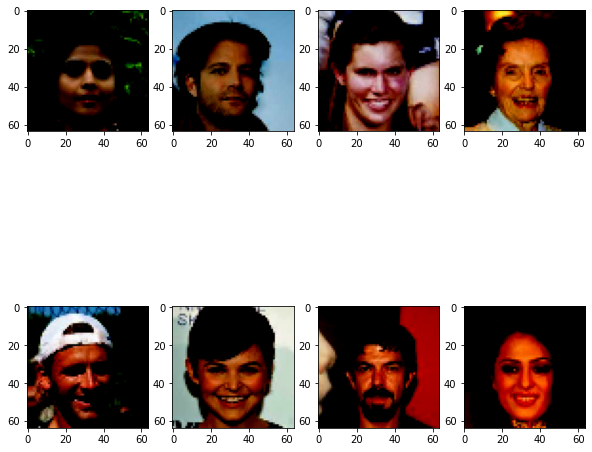

In [ ]:
for i_ in dataset.take(1):
  print(i_.shape)
  fig, ax = plt.subplots(2, 4, figsize=(10, 10))
  for e_, ei_ in enumerate(i_):
    ax[e_//4, e_-4 if e_>=4 else e_].imshow(ei_)
    if (e_//4, e_-4 if e_>=4 else e_)==(1, 3):
      break

**MODEL**

We are using a ProGAN(PROGRESSIVE GROWING OF GANs)

**MODEL TRAINING**

First let's try to train a model (you need to run for a long time 15 epochs at least) in order to get good looking outputs. Since you can't train your model in Colab for too long we are omitting that task but feel free to give it a try in your local machine!

At first the predictons are only noise and later it will start making sense

/content/GANJax
Initialization succeeded.
Iteration 0, resolution 8x8
-> Growing phase
 Epoch 1/2


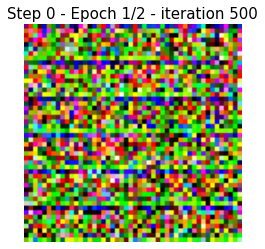

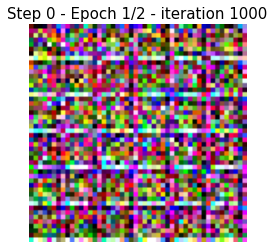

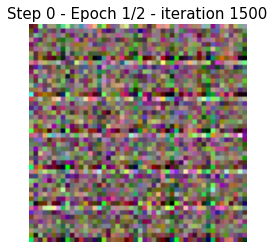

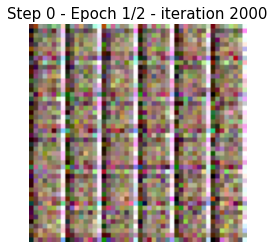

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-5df5eb6334dc>", line 34, in <module>
    save_step=save_step,
  File "/content/GANJax/gan/progan/trainer.py", line 310, in main
    mean_loss_disc, config
  File "/content/GANJax/gan/progan/trainer.py", line 205, in cycle_train
    mean_loss_disc(loss_disc)
  File "/content/GANJax/utils/means.py", line 21, in __call__
    val = val.item()
  File "/usr/local/lib/python3.7/dist-packages/jax/_src/device_array.py", line 225, in item
    return float(self)
  File "/usr/local/lib/python3.7/dist-packages/jax/_src/device_array.py", line 273, in <lambda>
    setattr(device_array, "__float__", lambda self: self._value.__float__())
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python

KeyboardInterrupt: ignored

In [ ]:
%cd /content/GANJax

from jax import numpy as jnp, random
from gan.progan import ProGAN as GAN
from utils.save_and_load import save_gan

gan = GAN()
trainer = gan.Trainer() 

# DCGAN configs
config = gan.Config(
    zdim=64,
    channels_gen=64,
    channels_disc=64,
    first_resolution=8,
    n_steps=1,
    growing_epochs = (EPOCHS,),
    fixed_epochs = (EPOCHS,),
    cylce_train_disc=2,
    lr_gen=1e-5,
    lr_disc=1e-6,
    lambda_gp=10,
)

params_gen, state_gen, params_disc, state_disc, history = trainer.main(
        dataset=dataset,
        key=key,
        config=config,
        max_time=None,
        display_step=display_step,
        num_images=num_images,
        plot=plot,
        model_path=MODEL_PATH,
        save_step=save_step,
        )

Save The Trained Model

After you have trained you can save it to the `MODEL_PATH` defined in the configs section, be aware that if somehow the model training is interrupted then you wont be albe to save your model so its better to save the state after some iterations by changing this `save_step`

In [ ]:
save_gan(params_gen, state_gen, params_disc, state_disc, config,
                 model_path=MODEL_PATH, with_states=with_states)

NameError: ignored

**TEST THE PRE-TRAINED MODEL**

We are very thankful to the author since he has provided pretrained DCGAN models on `CIFAR-10`, `CelebA` and `MNIST `datasets

I was facing some problems related to pickle so I had to rewrite `load_jax_model`.

In [ ]:
!pip install pickle5 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 KB 6.6 MB/s eta 0:00:00


In [ ]:
import haiku as hk
import pickle5 as pickle

def load_jax_model(model_path):
    param_path = os.path.join(model_path, 'params', 'params.pickle')
    state_path = os.path.join(model_path, 'state', 'state.pickle')
    with open(param_path, 'rb') as handle:
        params = pickle.load(handle)
    if os.path.exists(state_path):
        with open(state_path, 'rb') as handle:
            state = pickle.load(handle)
        return params, state
    else:
        return params
@hk.transform_with_state
def generate(zseed, config, n_samples=1, is_training=False):
    zkey = random.PRNGKey(zseed)
    kwargs_gen = config.get_models_kwargs()[0]
    generator = gan.Generator(**kwargs_gen)
    z = trainer.input_func(zkey, n_samples, config.zdim)
    X_fake = generator(z, is_training=is_training)
    return X_fake

class GANConfig(object):
    def __init__(self, **kwargs):
        self.default_init()
        for k, v in kwargs.items():
            if not hasattr(self, k):
                raise ValueError(f'Error in configs initialization: {k} '
                                 'is not a valid argument.')
            setattr(self, k, v)

    def default_init(self):
        """ Initialize default values for all attributes.

        self.att1 = default_val1
        self.att2 = default val2
        ...

        Warning: you should define a default value for ALL valid attributes.
        """
        raise NotImplementedError("You must overload default_init.")

    def get_models_kwargs(self):
        """ Return intitialization kwargs for generator
        and discriminator (parameters of __init__).
        See hk.data_structures.to_immutable_dict (or to_mutable_dict)
        to transform a dict to a (immutable or mutable) haiku dict.

        Returns:
            kwargs_gen: haiku dict
            kwargs_disc: haiku dict
        """
        raise NotImplementedError("You must overload get_models_kwargs.")

    def get_configs(self):
        configs = {}
        for attr in self.__dict__:
            if not attr.startswith('_'):
                configs[attr] = getattr(self, attr)
        return configs

    def save(self, path, verbose=True):
        configs = self.get_configs()
        head = os.path.split(path)[0]
        os.makedirs(head, exist_ok=True)
        with open(path, 'wb') as handle:
            pickle.dump(configs, handle,
                        protocol=pickle.HIGHEST_PROTOCOL)
        if verbose:
            print(f"Config saved at '{path}'.")

    def load(self, path):
        with open(path, 'rb') as handle:
            configs = pickle.load(handle)
        for attr, value in configs.items():
            setattr(self, attr, value)
        return self

class DCGANConfig(GANConfig):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def default_init(self):
        """ Overwrite the default_init to define the
        configs for the DCGAN. """
        # General
        self.cylce_train_disc = 5

        # Latent input vector
        self.zdim = 64

        # Generator
        self.channels_gen = (256, 128, 64, 1)
        self.ker_shapes_gen = (3, 4, 3, 4)
        self.strides_gen = (2, 1, 2, 2)
        self.padding_gen = (0, 0, 0, 0)
        self.name_gen = 'DCGAN_gen'
        self.lr_gen = 1e-4
        self.beta1_gen = 0.5
        self.beta2_gen = 0.999

        # Discriminator
        self.channels_disc = (16, 32, 1)
        self.ker_shapes_disc = 4
        self.strides_disc = 2
        self.padding_disc = (0, 0, 0, 0)
        self.name_disc = 'DCGAN_disc'
        self.lr_disc = 1e-4
        self.beta1_disc = 0.5
        self.beta2_disc = 0.999

    def get_models_kwargs(self):
        """ Overwrite the get_models_kwargs to get the
        configs required to init the modules of DCGAN. """
        kwargs_gen = {
            "channels": self.channels_gen,
            "ker_shapes": self.ker_shapes_gen,
            "strides": self.strides_gen,
            "padding": self.padding_gen,
            "name": self.name_gen
            }
        kwargs_disc = {
            "channels": self.channels_disc,
            "ker_shapes": self.ker_shapes_disc,
            "strides": self.strides_disc,
            "padding": self.padding_disc,
            "name": self.name_disc
            }
        kwargs_gen = hk.data_structures.to_immutable_dict(kwargs_gen)
        kwargs_disc = hk.data_structures.to_immutable_dict(kwargs_disc)
        return kwargs_gen, kwargs_disc

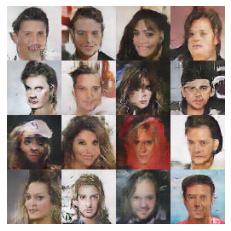

In [ ]:
from gan.dcgan import DCGAN as GAN
from utils.plot_img import plot_tensor_images

dataset_name = 'CelebA-64'
assert dataset_name in ['CIFAR-10','CelebA-64','MNIST']

pretrained_model_path = f'/content/GANJax/pre_trained/{dataset_name}/dcgan'
num_images = (4, 4)
cmap = 'gray'

gan = GAN()
trainer = gan.Trainer()

config = DCGANConfig().load(os.path.join(pretrained_model_path, 'config.pickle'))
params, state = load_jax_model(os.path.join(pretrained_model_path, 'generator'))

generate.init(zseed=SEED, config=config, n_samples=1, is_training=True, rng=0)

images, _ = generate.apply(params, state, key,
                               zseed=SEED,
                               config=config,
                               n_samples=num_images[0]*num_images[1],
                               is_training=False)

plot_tensor_images(images, num_images=num_images, cmap=cmap)
plt.show()

**CONCLUSION**

<ul>
<li>
We see that the predicted images(using the pretrained model) are pretty good but they are still distorted, In order to overcome issue we can try to train it for hundreads of epochs since the dataset is very large a data related problem won't arise.</li>
<li>
If you have made it to the end of the notebook without any error then congrats! and thanks for reading the notebook! 
</li>
<li>
If you have any suggestions about this notebook or if you feel that I did something wrong then please post them in the comments.
</li>
</ul>